# HR Attrition Prediction

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset

data = pd.read_csv(r"C:\Users\Ash\Desktop\Data Trained\Projects\Project 7/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
# print the top five rows of the dataset

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#check the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
#checking the missing values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


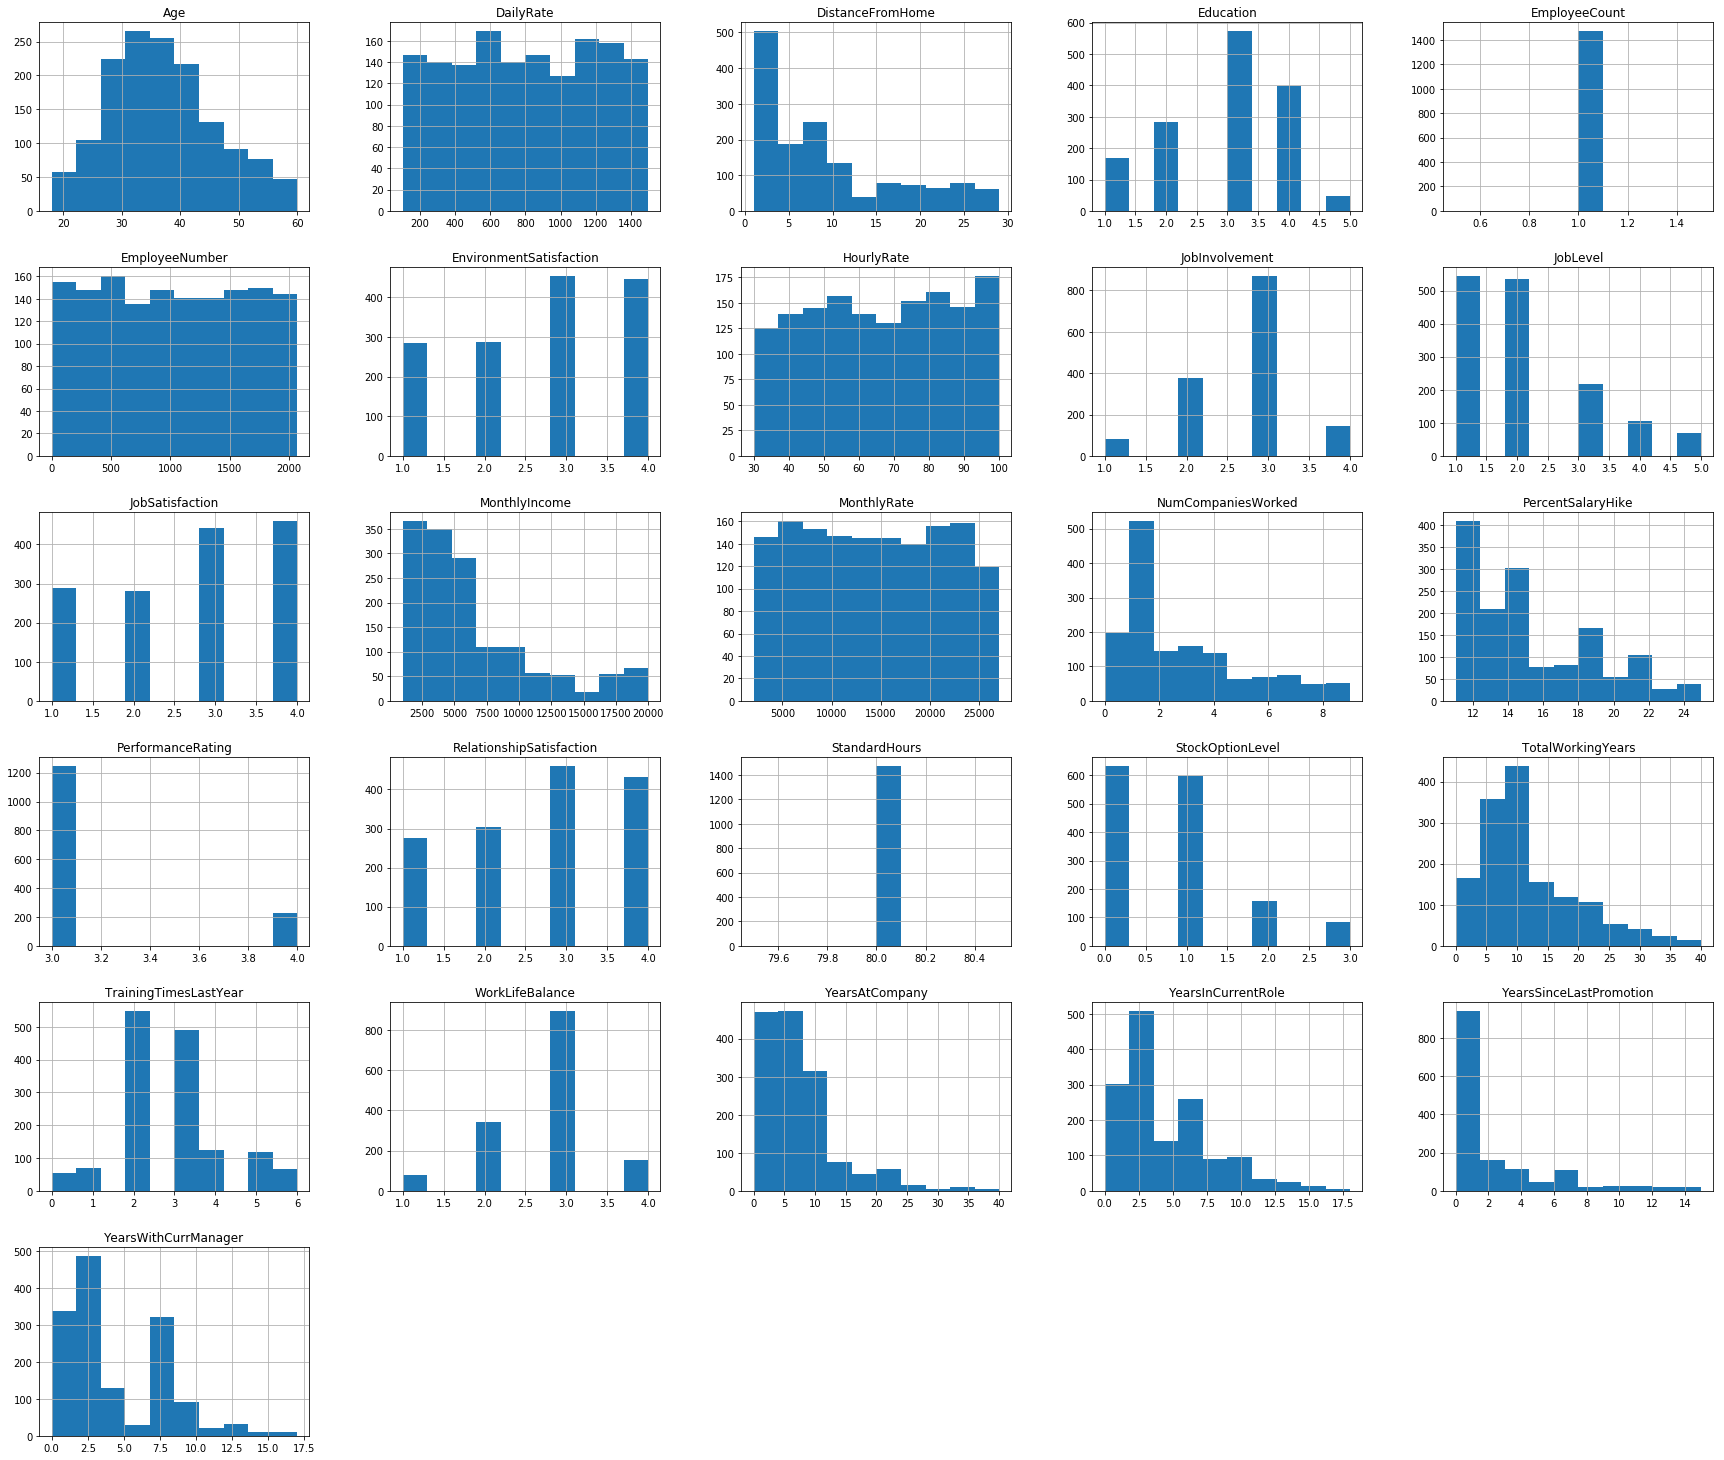

In [7]:
# Univariate analysis

data.hist(figsize=(30,26))
plt.show()


#### Plotted the boxplot for the entire dataset and came to know that there are outliers in the faeture Monthly Income

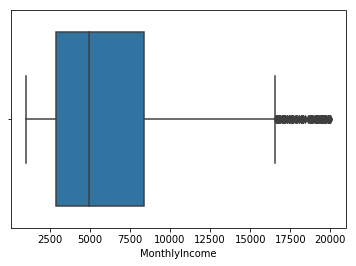

In [8]:
# check the outliers in the feature Monthly Income

sns.boxplot(data=data,x='MonthlyIncome')

In [9]:
# Treat the outliers

Q1 = data.MonthlyIncome.quantile(0.25)
Q3 = data.MonthlyIncome.quantile(0.75)
IQR = Q3-Q1

outlier_max = Q3+1.5*IQR

outlier_max

16581.0

In [10]:
new_data=data[(data['MonthlyIncome']<outlier_max)]
new_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [11]:
# we reduced the size of the data by outlier treatment

print('We reduced the data size by: %d' % (len(data) - len(new_data)))

We reduced the data size by: 114


In [12]:
# converting the target feature into numerical variable

from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
new_data['Attrition'] = le.fit_transform(new_data['Attrition'])

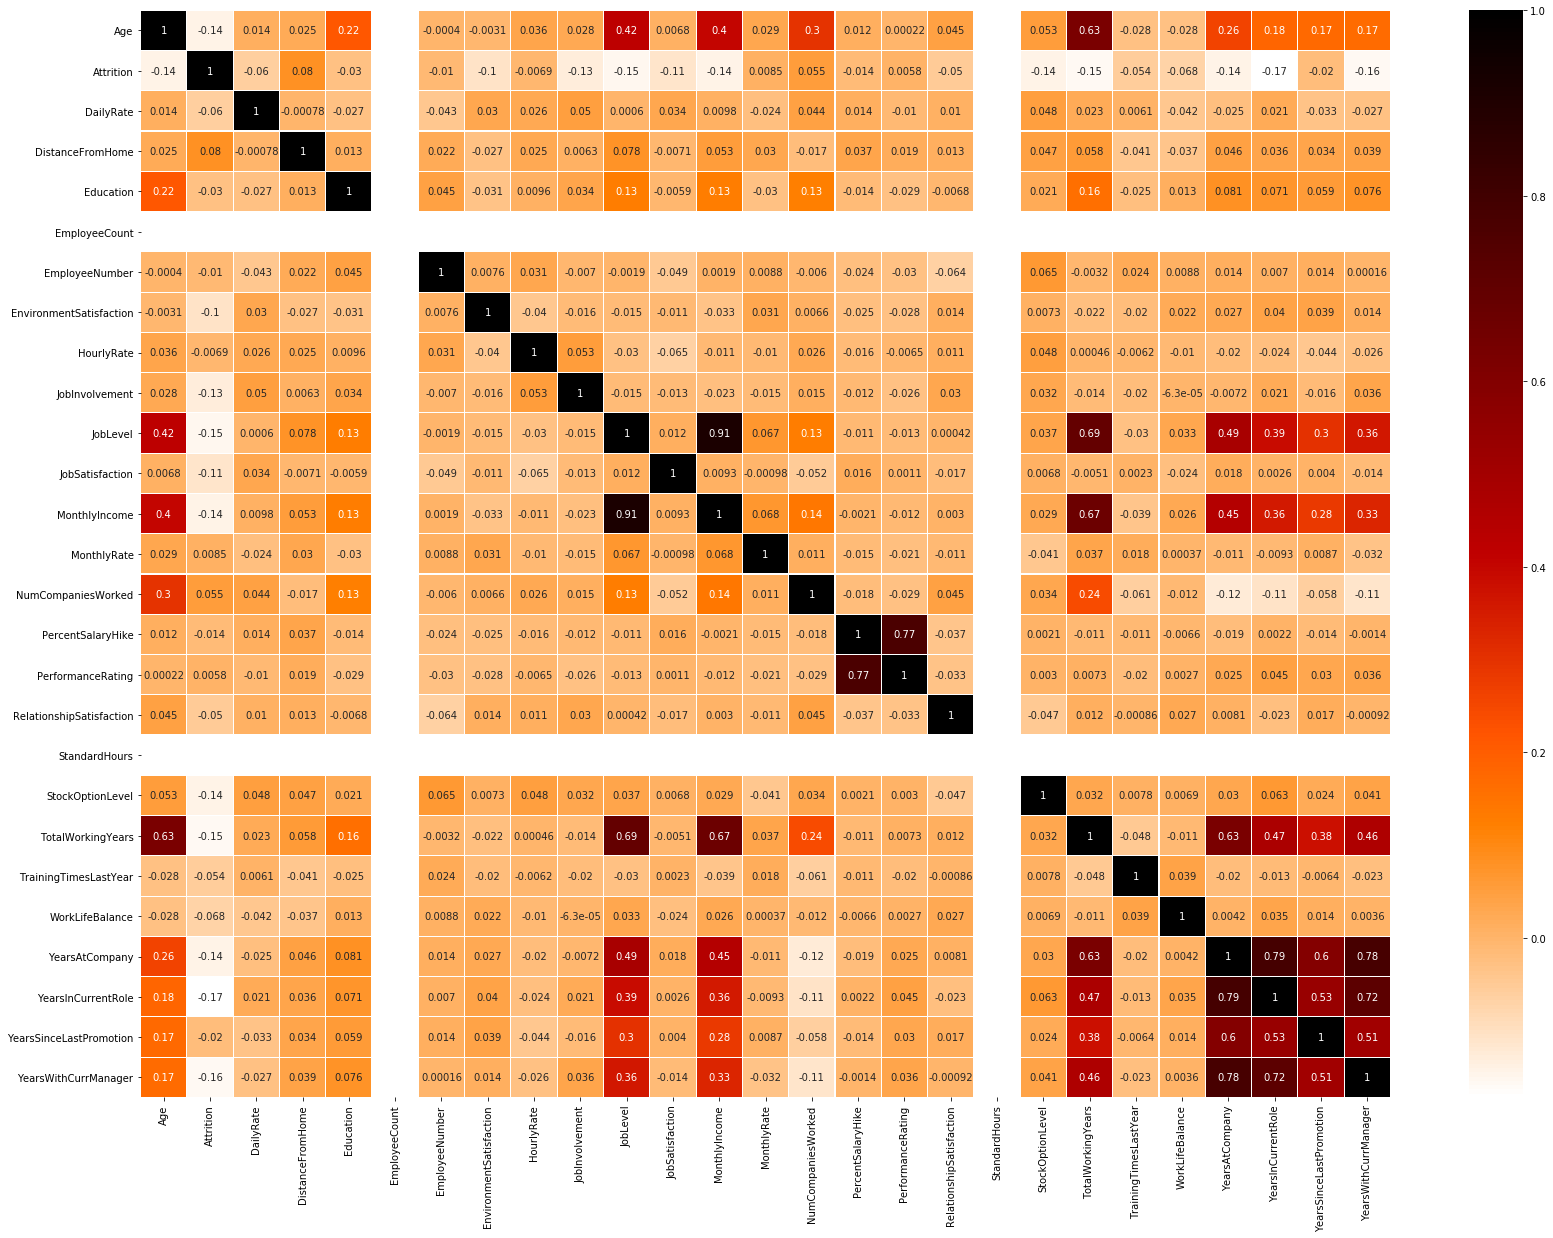

In [13]:
#checking the correlation betwen numerical features

plt.figure(figsize=(28,20))
sns.heatmap(new_data.corr(),cmap='gist_heat_r',annot=True,linewidths=0.1)

In [14]:
# Take features which are in good correlation with target feature

In [15]:
#segregating the numerical variables and categorical variables

data_cat = new_data[['BusinessTravel','Department','Education','Gender','JobRole','MaritalStatus',
                 'Over18','OverTime']].copy()

data_num = new_data[['Age','Attrition','DistanceFromHome','EnvironmentSatisfaction', 'HourlyRate', 
                     'JobInvolvement', 'JobSatisfaction','MonthlyRate', 'MonthlyIncome','StockOptionLevel',
                     'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']].copy()

In [16]:
# Since all the values in the feature Over18 are same, we can drop this column

data_cat['Over18'].value_counts()

Y    1356
Name: Over18, dtype: int64

In [17]:
data_cat.drop(['Over18'],axis=1,inplace=True)

In [18]:
#convert the categorical variables to numerical

data_cat = pd.get_dummies(data_cat)
data_cat.head()

,Education,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,JobRole_Healthcare Representative,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,2,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,4,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
# Concat both the numerical and categorical features together

data_final= pd.concat([data_num,data_cat], axis= 1)
data_final.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,MonthlyIncome,StockOptionLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,2,94,3,4,19479,5993,0,...,0,0,0,1,0,0,0,1,0,1
1,49,0,8,3,61,2,2,24907,5130,1,...,0,0,1,0,0,0,1,0,1,0
2,37,1,2,4,92,2,3,2396,2090,0,...,0,0,0,0,0,0,0,1,0,1
3,33,0,3,4,56,3,3,23159,2909,0,...,0,0,1,0,0,0,1,0,0,1
4,27,0,2,1,40,3,2,16632,3468,1,...,0,0,0,0,0,0,1,0,1,0


In [20]:
# segregate the independent and dependent variable

X = data_final.drop(['Attrition'],axis= 1)
y = data_final["Attrition"]

In [21]:
# scaling the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)
X

,Age,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,MonthlyIncome,StockOptionLevel,TotalWorkingYears,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.563466,-1.027431,-0.656059,1.384037,0.378407,1.147956,0.720236,0.147723,-0.925401,-0.309371,...,-0.346029,-0.174342,-0.523866,1.777501,-0.255344,-0.534142,-0.905613,1.433197,-1.585230,1.585230
1,1.471981,-0.166218,0.261071,-0.245090,-1.019740,-0.667354,1.481630,-0.112325,0.233273,-0.005490,...,-0.346029,-0.174342,1.908883,-0.562588,-0.255344,-0.534142,1.104225,-0.697741,0.630823,-0.630823
2,0.109209,-0.904400,1.178201,1.285302,-1.019740,0.240301,-1.676021,-1.028366,-0.925401,-0.461312,...,-0.346029,-0.174342,-0.523866,-0.562588,-0.255344,-0.534142,-0.905613,1.433197,-1.585230,1.585230
3,-0.345048,-0.781370,1.178201,-0.491927,0.378407,0.240301,1.236435,-0.781577,-0.925401,-0.309371,...,-0.346029,-0.174342,1.908883,-0.562588,-0.255344,-0.534142,1.104225,-0.697741,-1.585230,1.585230
4,-1.026433,-0.904400,-1.573190,-1.281807,0.378407,-0.667354,0.320884,-0.613134,0.233273,-0.613252,...,-0.346029,-0.174342,-0.523866,-0.562588,-0.255344,-0.534142,1.104225,-0.697741,0.630823,-0.630823
5,-0.458612,-0.904400,1.178201,0.643525,0.378407,1.147956,-0.347931,-0.733666,-0.925401,-0.309371,...,-0.346029,-0.174342,-0.523866,-0.562588,-0.255344,-0.534142,-0.905613,1.433197,0.630823,-0.630823
6,2.607623,-0.781370,0.261071,0.742260,1.776554,-1.575009,-0.614446,-0.853595,2.550620,0.298390,...,-0.346029,-0.174342,-0.523866,-0.562588,-0.255344,-0.534142,1.104225,-0.697741,-1.585230,1.585230
7,-0.685741,1.802268,1.178201,0.051115,0.378407,0.240301,-0.141591,-0.846664,0.233273,-1.372954,...,-0.346029,-0.174342,-0.523866,-0.562588,-0.255344,1.872160,-0.905613,-0.697741,0.630823,-0.630823
8,0.222774,1.679238,1.178201,-1.084337,-1.019740,0.240301,-0.779546,1.212319,-0.925401,-0.005490,...,2.889935,-0.174342,-0.523866,-0.562588,-0.255344,-0.534142,-0.905613,1.433197,0.630823,-0.630823
9,-0.004355,2.171359,0.261071,1.384037,0.378407,0.240301,0.313169,-0.080082,1.391946,1.058092,...,-0.346029,-0.174342,-0.523866,-0.562588,-0.255344,-0.534142,1.104225,-0.697741,0.630823,-0.630823


In [22]:
# Segregate the train and test split

from sklearn.model_selection import train_test_split, KFold, cross_val_score

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

## Implementing all the models

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:
results = []
names = []
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))

# evaluate each model in turn
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, train_X, train_y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

LR: 85.567766 (0.028286)
KNN: 84.244200 (0.033759)
DT: 76.860806 (0.036651)
NB: 37.549451 (0.050053)
SVM: 85.235653 (0.030363)
RFC: 84.354090 (0.045598)


In [25]:
#Since Logistic Regression is the best fitted model

lr = LogisticRegression()
lr.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
lr_predicted = lr.predict(test_X)
lr_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
#checking the accuracy of the model on the test data

lr_score = accuracy_score(test_y,lr_predicted)
print('Accuracy of the model : %.2f' % (lr_score*100))

print('Classifiction report :')
print(classification_report(test_y,lr_predicted))

print('confusion matrix :')
print(confusion_matrix(test_y,lr_predicted))

Accuracy of the model : 86.38
Classifiction report :
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       371
           1       0.67      0.40      0.50        77

   micro avg       0.86      0.86      0.86       448
   macro avg       0.78      0.68      0.71       448
weighted avg       0.85      0.86      0.85       448

confusion matrix :
[[356  15]
 [ 46  31]]


AUC : 0.68


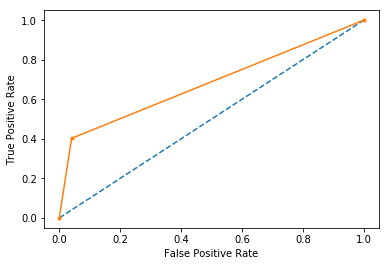

In [28]:
# Calculating the AUC

auc_score = roc_auc_score(test_y,lr_predicted)
print('AUC : %.2f' % auc_score)

# plotting the aur roc curve

x,y,z=roc_curve(test_y,lr_predicted)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(x,y, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()